<a href="https://colab.research.google.com/github/behnam-sa/naive-dog-cat-classifier/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data preparation

##Download the dataset

In [ ]:
# Download files and unzip
!gdown --id 1-3-CsyZ57A-pxjiO7zMiUO7OYjt8rj1A
!gdown --id 1Bge0f9inkC-c0rZ1JdD11nfXpo4rFalC

print('Extracting training set')
!unrar x training_set.rar -o+ -idq

print('Extracting test set')
!unrar x test_set.rar -o+ -idq

print('Done')

Downloading...
From: https://drive.google.com/uc?id=1-3-CsyZ57A-pxjiO7zMiUO7OYjt8rj1A
To: /content/test_set.rar
45.8MB [00:00, 81.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Bge0f9inkC-c0rZ1JdD11nfXpo4rFalC
To: /content/training_set.rar
182MB [00:03, 48.9MB/s]
Extracting training set
Extracting test set
Done


##Import required packages

In [ ]:
# imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array


print(tf.__version__)

2.5.0


##Show some sample images

In [ ]:
# define location of dataset
train_path = 'training_set/'
test_path = 'test_set/'

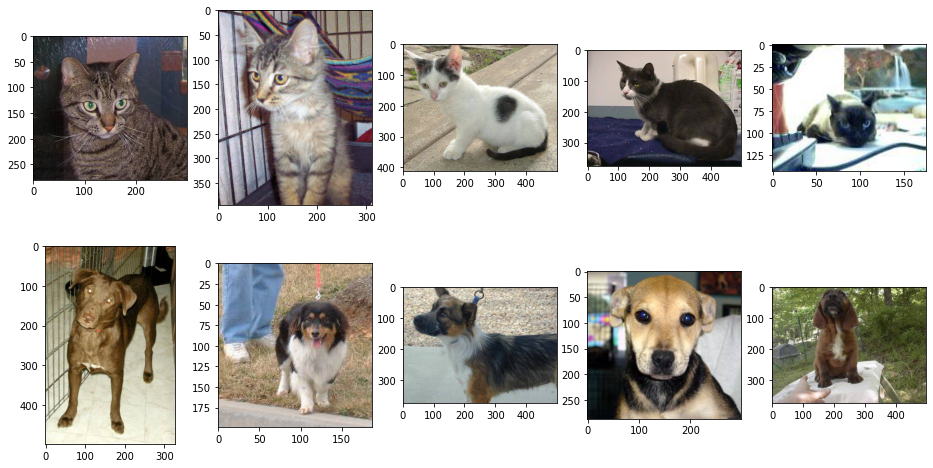

In [ ]:
# show first few photos from the dogs vs cats dataset
num_samples = 5
plt.figure(figsize=(16, 8))
for j in range(2):
    for i in range(num_samples):
        plt.subplot(2, num_samples, j * num_samples + i + 1)
        if j == 0:
            filename = train_path + 'cats/cat.' + str(i + 1) + '.jpg'
        else:
            filename = train_path + 'dogs/dog.' + str(i + 1) + '.jpg'
        image = imread(filename)
        plt.imshow(image)
 
plt.show()

##Load and resize images to 128×128 pixels

In [ ]:
image_size = (128, 128)

def load_images(path):
    images, labels = [], []
    for label in ['cat', 'dog']:
        folder = path + label + 's/'
        for filename in os.listdir(folder):
            filepath = folder + filename
            photo = img_to_array(load_img(filepath, target_size=image_size)) / 255
            images += [photo]
            labels += [0 if label == 'cat' else 1]
    return np.array(images), np.array(labels)

train_images, train_labels = load_images(train_path)
test_images, test_labels = load_images(test_path)

#Sample fully connected model
Create a simple fully connected model and measure its performance

In [ ]:
# plot model accuracy against epoch
def plot_history(history):
    plt.plot(np.array(history.history['accuracy']) * 100, label='training')
    plt.plot(np.array(history.history['val_accuracy']) * 100, label = 'validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend(loc='upper left')

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(*image_size, 3)),
    layers.Dense(5000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0005, momentum=0.9),
              loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=50, batch_size=500,
                    validation_data=(test_images, test_labels), verbose=1)

Epoch 1/50
16/16 [==============================] - 5s 265ms/step - loss: 0.6948 - accuracy: 0.5015 - val_loss: 0.6887 - val_accuracy: 0.5390
Epoch 2/50
16/16 [==============================] - 4s 265ms/step - loss: 0.6826 - accuracy: 0.5715 - val_loss: 0.6783 - val_accuracy: 0.5900
Epoch 3/50
16/16 [==============================] - 5s 289ms/step - loss: 0.6736 - accuracy: 0.5878 - val_loss: 0.6710 - val_accuracy: 0.6120
Epoch 4/50
16/16 [==============================] - 4s 270ms/step - loss: 0.6679 - accuracy: 0.5946 - val_loss: 0.6774 - val_accuracy: 0.5725
Epoch 5/50
16/16 [==============================] - 4s 266ms/step - loss: 0.6602 - accuracy: 0.6094 - val_loss: 0.6621 - val_accuracy: 0.6130
Epoch 6/50
16/16 [==============================] - 4s 278ms/step - loss: 0.6487 - accuracy: 0.6352 - val_loss: 0.6574 - val_accuracy: 0.6225
Epoch 7/50
16/16 [==============================] - 4s 274ms/step - loss: 0.6413 - accuracy: 0.6411 - val_loss: 0.6548 - val_accuracy: 0.6285
Epoch 

63/63 - 1s - loss: 0.6312 - accuracy: 0.6475


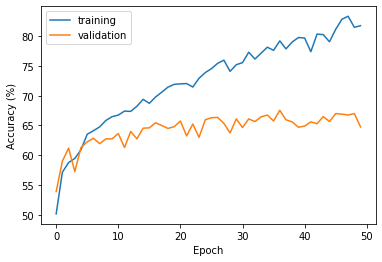

In [ ]:
plot_history(history)

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

We can see that the model is overfitting the data and the validation accuracy is low. We can somewhat reduce overfitting by applying regularization and early stopping.

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(*image_size, 3)),
    layers.Dense(5000, activation='relu', kernel_regularizer='l2'),
    layers.Dense(1000, activation='relu', kernel_regularizer='l2'),
    layers.Dense(100, activation='relu', kernel_regularizer='l2'),
    layers.Dense(10, activation='relu', kernel_regularizer='l2'),
    layers.Dense(1, activation='sigmoid', kernel_regularizer='l2'),
])

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0005, momentum=0.9),
              loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                patience=20, restore_best_weights=True)

In [ ]:
history = model.fit(train_images, train_labels, epochs=50, batch_size=500,
                    validation_data=(test_images, test_labels),
                    callbacks=[callback], verbose=1)

Epoch 1/50
16/16 [==============================] - 6s 307ms/step - loss: 110.0719 - accuracy: 0.5318 - val_loss: 109.9380 - val_accuracy: 0.5760
Epoch 2/50
16/16 [==============================] - 5s 301ms/step - loss: 109.7820 - accuracy: 0.5964 - val_loss: 109.6139 - val_accuracy: 0.5835
Epoch 3/50
16/16 [==============================] - 5s 320ms/step - loss: 109.4398 - accuracy: 0.6079 - val_loss: 109.2544 - val_accuracy: 0.6180
Epoch 4/50
16/16 [==============================] - 5s 304ms/step - loss: 109.0837 - accuracy: 0.6221 - val_loss: 108.9079 - val_accuracy: 0.6145
Epoch 5/50
16/16 [==============================] - 5s 326ms/step - loss: 108.7307 - accuracy: 0.6332 - val_loss: 108.5621 - val_accuracy: 0.6070
Epoch 6/50
16/16 [==============================] - 5s 311ms/step - loss: 108.3744 - accuracy: 0.6481 - val_loss: 108.2064 - val_accuracy: 0.6335
Epoch 7/50
16/16 [==============================] - 5s 324ms/step - loss: 108.0229 - accuracy: 0.6589 - val_loss: 107.8676 -

Training data: loss = 93.89, accuracy = 84.24%
Test data: loss = 94.05, accuracy = 67.40%


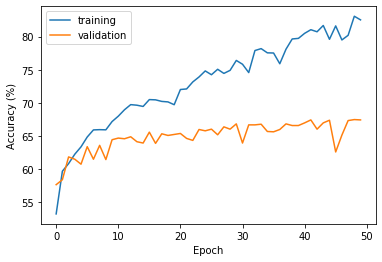

In [ ]:
plot_history(history)

train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=3)
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=3)

print(f'Training data: loss = {train_loss:.2f}, accuracy = {train_accuracy * 100:.2f}%')
print(f'Test data: loss = {test_loss:.2f}, accuracy = {test_accuracy * 100:.2f}%')

Now we can see that the validation accuracy has increased a little bit.


#Adjusting parameters


##Adjusting the learning rate
We now test different values for the learning rate of the stochastic gradient descent optimization algorithm ranging between 0.1 and 0.0001 and compare the learning curves.
Batch size is held constant at 1000.
Running this section can take about 20 minutes.


In [ ]:
def construct_and_train_model(epochs=50, lr=0.0005, batch_size=1000):

    # release resources
    tf.keras.backend.clear_session()

    model = models.Sequential([
        layers.Flatten(input_shape=(*image_size, 3)),
        layers.Dense(5000, activation='relu', kernel_regularizer='l2'),
        layers.Dense(1000, activation='relu', kernel_regularizer='l2'),
        layers.Dense(100, activation='relu', kernel_regularizer='l2'),
        layers.Dense(10, activation='relu', kernel_regularizer='l2'),
        layers.Dense(1, activation='sigmoid', kernel_regularizer='l2'),
    ])

    model.compile(optimizer=keras.optimizers.SGD(learning_rate=lr, momentum=0.9),
              loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                    patience=20, restore_best_weights=True)

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size,
                        validation_data=(test_images, test_labels),
                        callbacks=[callback], verbose=0)
    
    return (model, history)

In [ ]:
## plot model accuracy against epoch
def plot_history(history):
    plt.plot(np.array(history.history['accuracy']) * 100, label='training')
    plt.plot(np.array(history.history['val_accuracy']) * 100, label = 'validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend(loc='lower right')

In [ ]:
# this can take a long time
learning_rates = [0.1, 0.005, 0.0005, 0.0002, 0.0001]
the_models = []
histories = []

for i, lr in enumerate(learning_rates):
    print(f'Fitting on learning rate {lr:.4f}. Please wait...')

    model, history = construct_and_train_model(lr=lr)

    the_models.append(model)
    histories.append(history)

Fitting on learning rate 0.1000. Please wait...
Fitting on learning rate 0.0050. Please wait...
Fitting on learning rate 0.0005. Please wait...
Fitting on learning rate 0.0002. Please wait...
Fitting on learning rate 0.0001. Please wait...


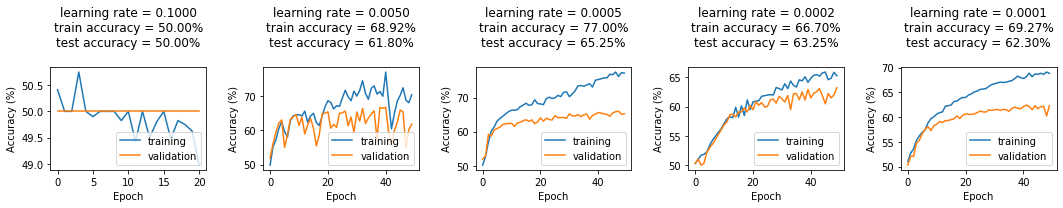

In [ ]:
plt.figure(figsize=(3 * len(histories), 3))
for i, history in enumerate(histories):
    train_loss, train_accuracy = the_models[i].evaluate(train_images, train_labels, verbose=3)
    test_loss, test_accuracy = the_models[i].evaluate(test_images, test_labels, verbose=3)

    title = f'learning rate = {learning_rates[i]:.4f}\n'
    title += f'train accuracy = {train_accuracy * 100:.2f}%\n'
    title += f'test accuracy = {test_accuracy * 100:.2f}%\n'

    plt.subplot(1, len(histories), i + 1)
    plt.title(title)
    plot_history(history)

plt.tight_layout()
plt.show()

We can see that for high learning rates, the learning curve does not converge and for low values, it takes a longer time to converge. so choosing the right value is important.


##Adjusting batch size
We then train the model using different batch sizes ranging between 50 and 1000 and compare the results. This section can take about 20 minutes.

In [ ]:
# this can take a while
batch_sizes = [1000, 500, 200, 100, 50]
the_models = []
histories = []

for i, batch_size in enumerate(batch_sizes):
    print(f'Fitting with batch size {batch_size}. Please wait...')

    model, history = construct_and_train_model(epochs=20, batch_size=batch_size)

    the_models.append(model)
    histories.append(history)

print('Done!')

Fitting with batch size 1000. Please wait...
Fitting with batch size 500. Please wait...
Fitting with batch size 200. Please wait...
Fitting with batch size 100. Please wait...
Fitting with batch size 50. Please wait...
Done!


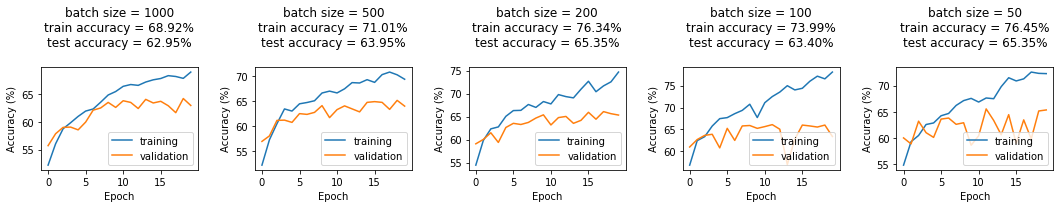

In [ ]:
plt.figure(figsize=(3 * len(histories), 3))
for i, history in enumerate(histories):
    # release resources
    tf.keras.backend.clear_session()

    train_loss, train_accuracy = the_models[i].evaluate(train_images, train_labels, verbose=3)
    test_loss, test_accuracy = the_models[i].evaluate(test_images, test_labels, verbose=3)

    title = f'batch size = {batch_sizes[i]}\n'
    title += f'train accuracy = {train_accuracy * 100:.2f}%\n'
    title += f'test accuracy = {test_accuracy * 100:.2f}%\n'

    plt.subplot(1, len(histories), i + 1)
    plt.title(title)
    plot_history(history)
    
plt.tight_layout()
plt.show()

We can see that a large batch size leads to more training epochs and for a very small batch size the model is difficult to converge and also takes more time for training. So choosing a reasonable batch size is also impotant. 

#Training different fully connected models
We now create and train 2 other models with different number of layers and compare the results to the original. The models are trained for 25 epochs to save time.

In [ ]:
# release resources
tf.keras.backend.clear_session()

model1 = models.Sequential([
    layers.Flatten(input_shape=(*image_size, 3)),
    layers.Dense(5000, activation='relu', kernel_regularizer='l2'),
    layers.Dense(1000, activation='relu', kernel_regularizer='l2'),
    layers.Dense(100, activation='relu', kernel_regularizer='l2'),
    layers.Dense(10, activation='relu', kernel_regularizer='l2'),
    layers.Dense(1, activation='sigmoid', kernel_regularizer='l2'),
])

model1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0005, momentum=0.9),
            loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                patience=20, restore_best_weights=True)

history1 = model1.fit(train_images, train_labels, epochs=25, batch_size=1000,
                    validation_data=(test_images, test_labels),
                    callbacks=[callback2], verbose=1)

Epoch 1/25
8/8 [==============================] - 7s 543ms/step - loss: 110.1363 - accuracy: 0.5071 - val_loss: 110.0882 - val_accuracy: 0.5290
Epoch 2/25
8/8 [==============================] - 4s 548ms/step - loss: 110.0311 - accuracy: 0.5502 - val_loss: 109.9506 - val_accuracy: 0.5715
Epoch 3/25
8/8 [==============================] - 4s 556ms/step - loss: 109.8822 - accuracy: 0.5732 - val_loss: 109.7906 - val_accuracy: 0.5895
Epoch 4/25
8/8 [==============================] - 4s 565ms/step - loss: 109.7144 - accuracy: 0.5929 - val_loss: 109.6217 - val_accuracy: 0.5825
Epoch 5/25
8/8 [==============================] - 5s 575ms/step - loss: 109.5401 - accuracy: 0.6090 - val_loss: 109.4457 - val_accuracy: 0.6060
Epoch 6/25
8/8 [==============================] - 4s 570ms/step - loss: 109.3635 - accuracy: 0.6129 - val_loss: 109.2707 - val_accuracy: 0.6145
Epoch 7/25
8/8 [==============================] - 4s 538ms/step - loss: 109.1859 - accuracy: 0.6269 - val_loss: 109.0954 - val_accuracy:

In [ ]:
tf.keras.backend.clear_session()

model2 = models.Sequential([
    layers.Flatten(input_shape=(*image_size, 3)),
    layers.Dense(4096, activation='relu', kernel_regularizer='l2'),
    layers.Dense(1024, activation='relu', kernel_regularizer='l2'),
    layers.Dense(256, activation='relu', kernel_regularizer='l2'),
    layers.Dense(64, activation='relu', kernel_regularizer='l2'),
    layers.Dense(16, activation='relu', kernel_regularizer='l2'),
    layers.Dense(4, activation='relu', kernel_regularizer='l2'),
    layers.Dense(1, activation='sigmoid', kernel_regularizer='l2'),
])

model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0005, momentum=0.9),
            loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                patience=20, restore_best_weights=True)

history2 = model2.fit(train_images, train_labels, epochs=25, batch_size=1000,
                    validation_data=(test_images, test_labels),
                    callbacks=[callback2], verbose=1)

Epoch 1/25
8/8 [==============================] - 4s 396ms/step - loss: 98.1808 - accuracy: 0.5050 - val_loss: 98.1167 - val_accuracy: 0.4970
Epoch 2/25
8/8 [==============================] - 3s 405ms/step - loss: 98.0706 - accuracy: 0.5063 - val_loss: 98.0031 - val_accuracy: 0.5205
Epoch 3/25
8/8 [==============================] - 3s 389ms/step - loss: 97.9446 - accuracy: 0.5203 - val_loss: 97.8645 - val_accuracy: 0.5415
Epoch 4/25
8/8 [==============================] - 3s 385ms/step - loss: 97.8005 - accuracy: 0.5419 - val_loss: 97.7152 - val_accuracy: 0.5660
Epoch 5/25
8/8 [==============================] - 3s 384ms/step - loss: 97.6490 - accuracy: 0.5461 - val_loss: 97.5619 - val_accuracy: 0.5690
Epoch 6/25
8/8 [==============================] - 3s 431ms/step - loss: 97.4951 - accuracy: 0.5443 - val_loss: 97.4071 - val_accuracy: 0.5590
Epoch 7/25
8/8 [==============================] - 3s 385ms/step - loss: 97.3396 - accuracy: 0.5537 - val_loss: 97.2518 - val_accuracy: 0.5625
Epoch 

In [ ]:
model3 = models.Sequential([
    layers.Flatten(input_shape=(*image_size, 3)),
    layers.Dense(7500, activation='relu', kernel_regularizer='l2'),
    layers.Dense(7500, activation='relu', kernel_regularizer='l2'),
    layers.Dense(400, activation='relu', kernel_regularizer='l2'),
    layers.Dense(1, activation='sigmoid', kernel_regularizer='l2'),
])

model3.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0005, momentum=0.9),
            loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

callback3 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                patience=20, restore_best_weights=True)

history3 = model3.fit(train_images, train_labels, epochs=25, batch_size=1000,
                    validation_data=(test_images, test_labels),
                    callbacks=[callback3], verbose=1)

Epoch 1/25
8/8 [==============================] - 8s 783ms/step - loss: 213.4336 - accuracy: 0.5132 - val_loss: 213.3396 - val_accuracy: 0.5105
Epoch 2/25
8/8 [==============================] - 6s 787ms/step - loss: 213.2240 - accuracy: 0.5384 - val_loss: 213.0639 - val_accuracy: 0.5875
Epoch 3/25
8/8 [==============================] - 7s 864ms/step - loss: 212.9364 - accuracy: 0.5819 - val_loss: 212.7590 - val_accuracy: 0.5910
Epoch 4/25
8/8 [==============================] - 7s 884ms/step - loss: 212.6140 - accuracy: 0.6054 - val_loss: 212.4317 - val_accuracy: 0.6075
Epoch 5/25
8/8 [==============================] - 6s 804ms/step - loss: 212.2839 - accuracy: 0.6090 - val_loss: 212.1001 - val_accuracy: 0.6175
Epoch 6/25
8/8 [==============================] - 6s 809ms/step - loss: 211.9470 - accuracy: 0.6124 - val_loss: 211.7612 - val_accuracy: 0.6170
Epoch 7/25
8/8 [==============================] - 7s 871ms/step - loss: 211.6035 - accuracy: 0.6311 - val_loss: 211.4226 - val_accuracy:

In [ ]:
## plot model accuracy against epoch
def plot_history(history):
    plt.plot(np.array(history.history['accuracy']) * 100, label='training')
    plt.plot(np.array(history.history['val_accuracy']) * 100, label = 'validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend(loc='lower right')

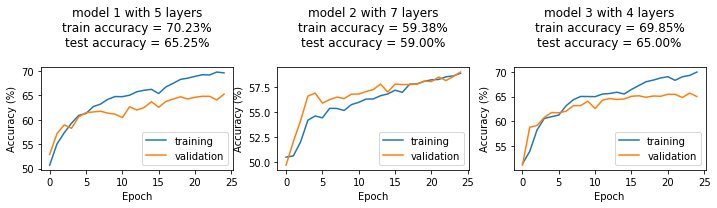

In [ ]:
plt.figure(figsize=(10, 3))
for i, (history, model, num_layers) in enumerate(
    zip([history1, history2, history3], [model1, model2, model3], [5, 7, 4])):
    # release resources
    tf.keras.backend.clear_session()

    train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=3)
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=3)

    title = f'model {i + 1} with {num_layers} layers\n'
    title += f'train accuracy = {train_accuracy * 100:.2f}%\n'
    title += f'test accuracy = {test_accuracy * 100:.2f}%\n'

    plt.subplot(1, 3, i + 1)
    plt.title(title)
    plot_history(history)
    
plt.tight_layout()
plt.show()

We can see that although a model with a higher number of neurons has more capacity and flexibility, it requires a longer training time.

#Displaying some of the incorrectly classified images

In [ ]:
# release resources
tf.keras.backend.clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=(*image_size, 3)),
    layers.Dense(5000, activation='relu', kernel_regularizer='l2'),
    layers.Dense(1000, activation='relu', kernel_regularizer='l2'),
    layers.Dense(100, activation='relu', kernel_regularizer='l2'),
    layers.Dense(10, activation='relu', kernel_regularizer='l2'),
    layers.Dense(1, activation='sigmoid', kernel_regularizer='l2'),
])

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0005, momentum=0.9),
            loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                patience=20, restore_best_weights=True)

history = model1.fit(train_images, train_labels, epochs=50, batch_size=1000,
                    validation_data=(test_images, test_labels),
                    callbacks=[callback], verbose=1)

Epoch 1/25
8/8 [==============================] - 7s 543ms/step - loss: 110.1363 - accuracy: 0.5071 - val_loss: 110.0882 - val_accuracy: 0.5290
Epoch 2/25
8/8 [==============================] - 4s 548ms/step - loss: 110.0311 - accuracy: 0.5502 - val_loss: 109.9506 - val_accuracy: 0.5715
Epoch 3/25
8/8 [==============================] - 4s 556ms/step - loss: 109.8822 - accuracy: 0.5732 - val_loss: 109.7906 - val_accuracy: 0.5895
Epoch 4/25
8/8 [==============================] - 4s 565ms/step - loss: 109.7144 - accuracy: 0.5929 - val_loss: 109.6217 - val_accuracy: 0.5825
Epoch 5/25
8/8 [==============================] - 5s 575ms/step - loss: 109.5401 - accuracy: 0.6090 - val_loss: 109.4457 - val_accuracy: 0.6060
Epoch 6/25
8/8 [==============================] - 4s 570ms/step - loss: 109.3635 - accuracy: 0.6129 - val_loss: 109.2707 - val_accuracy: 0.6145
Epoch 7/25
8/8 [==============================] - 4s 538ms/step - loss: 109.1859 - accuracy: 0.6269 - val_loss: 109.0954 - val_accuracy:

In [ ]:
predictions = model.predict(test_images)

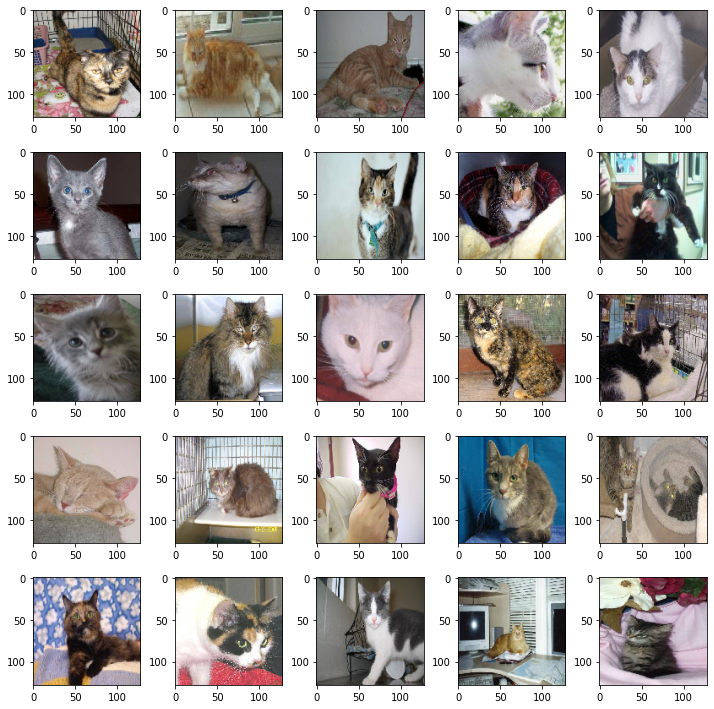

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * num_cols, 2 * num_rows))
i = 0
for k in range(8000):
    if i >= num_images:
        break

    if (predictions[k,0] > 0.5 and test_labels[k] == 0) or (predictions[k,0] < 0.5 and test_labels[k] == 1):
        image = test_images[k]
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(image)
        i += 1

plt.tight_layout()
plt.show()

We can see that the proposed fully connected model has incorrectly classified these images. It has a low validation accuracy ( < 70%) and overfits the data easily. A pure fully connected network functions poorly for image classification. A convolutional neural network is a much better option.


#A simple convolutional model

We can create a relatively simple CNN for this task that has a much higher accuracy than that of the above models. To acheive better generalization we can use regularization and dropouts.

In [ ]:
# release resources
tf.keras.backend.clear_session()

model = models.Sequential([
    layers.Convolution2D(32, (3, 3), input_shape=(*image_size, 3), activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2, 2)),
    layers.Convolution2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2, 2)),
    layers.Convolution2D(128, (3, 3), activation='relu'),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 61, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       7

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.005, momentum=0.9),
              loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=50, batch_size=500,
                    validation_data=(test_images, test_labels), verbose=1)

Epoch 1/50
16/16 [==============================] - 14s 412ms/step - loss: 3.2337 - accuracy: 0.5166 - val_loss: 3.2005 - val_accuracy: 0.5810
Epoch 2/50
16/16 [==============================] - 6s 405ms/step - loss: 3.1634 - accuracy: 0.5535 - val_loss: 3.1181 - val_accuracy: 0.5925
Epoch 3/50
16/16 [==============================] - 7s 409ms/step - loss: 3.0764 - accuracy: 0.5830 - val_loss: 3.0318 - val_accuracy: 0.6165
Epoch 4/50
16/16 [==============================] - 7s 415ms/step - loss: 2.9890 - accuracy: 0.6049 - val_loss: 2.9488 - val_accuracy: 0.6135
Epoch 5/50
16/16 [==============================] - 7s 414ms/step - loss: 2.9130 - accuracy: 0.5976 - val_loss: 2.8825 - val_accuracy: 0.6015
Epoch 6/50
16/16 [==============================] - 7s 417ms/step - loss: 2.8331 - accuracy: 0.6140 - val_loss: 2.8016 - val_accuracy: 0.6135
Epoch 7/50
16/16 [==============================] - 7s 413ms/step - loss: 2.7500 - accuracy: 0.6305 - val_loss: 2.7245 - val_accuracy: 0.6300
Epoch

In [ ]:
# plot model accuracy against epoch
def plot_history(history):
    plt.plot(np.array(history.history['accuracy']) * 100, label='training')
    plt.plot(np.array(history.history['val_accuracy']) * 100, label = 'validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend(loc='upper left')

63/63 - 1s - loss: 1.0367 - accuracy: 0.7695


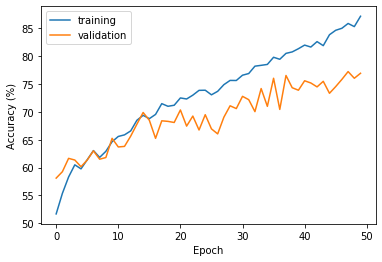

In [ ]:
plot_history(history)

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

Here, the learning curves show less overffiting and higher accuracies that can reach above 80% with more epochs. It is clear that a CNN performs better for image classification problems.